In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('movies_data_processed.csv')
# df.head()

In [3]:
sns.set_theme(style='dark') #apply the default theme

In [4]:
variables=['url','ROI','result']
df_new=df.drop(variables,axis=1)
# df_new.head()


In [5]:
df_filtered=df_new.dropna(subset=["gross","no_of_votes"])

In [6]:
numeric_cols=df_filtered.select_dtypes(include=['number'])
df_corr=numeric_cols.corr()
df_corr.style.background_gradient(cmap="Greens")

,rating,no_of_votes,meta_score,release_date,gross,budget
rating,1.000000,0.461577,0.698321,-0.239355,0.140119,-0.046567
no_of_votes,0.461577,1.000000,0.265823,0.011509,0.533907,0.306588
meta_score,0.698321,0.265823,1.000000,-0.181780,0.033720,-0.097297
release_date,-0.239355,0.011509,-0.181780,1.000000,0.165231,0.376250
gross,0.140119,0.533907,0.033720,0.165231,1.000000,0.708749
budget,-0.046567,0.306588,-0.097297,0.376250,0.708749,1.000000


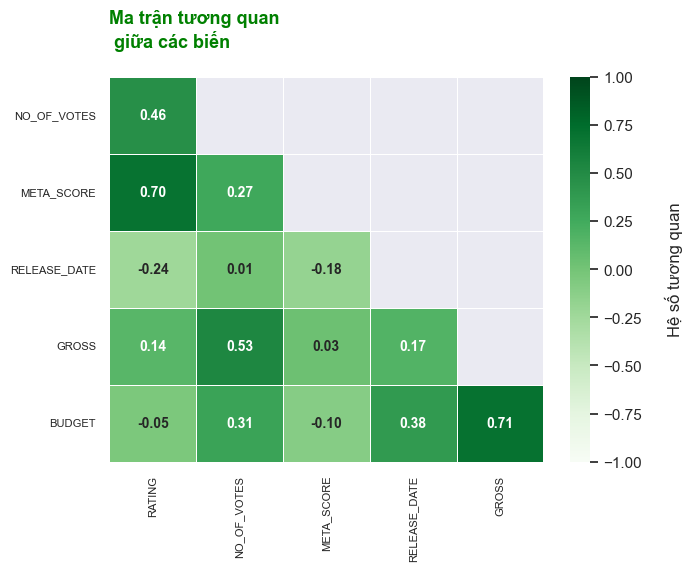

In [7]:
ones_corr=np.ones_like(df_corr,dtype=bool) #ma trận gồm các gía trị boolean có shape giống với data
mask=np.triu(ones_corr)# trả về ma trận tam giác trêntrên
adjusted_mask=mask[1:,:-1]
adjusted_df_corr=df_corr.iloc[1:,:-1]#bỏ hàng đầu tiên và cột cuối 

fig,ax=plt.subplots(figsize=(7,5))
# cmap=sns.diverging_palette(0,260.8,67.2,50.0,as_cmap=True)
sns.heatmap(data=adjusted_df_corr,mask=adjusted_mask,cmap="Greens",annot=True,annot_kws={"fontsize":10,"fontweight":'bold'},
            fmt='.2f',vmin=-1,vmax=1,linecolor='white',linewidths=0.7,    
            cbar_kws={"label": "\nHệ số tương quan"} )

yticks=[i.upper() for i in adjusted_df_corr.index]
xticks=[i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks,rotation=0,fontsize=8);
ax.set_xticklabels(xticks,rotation=90,fontsize=8);

title="Ma trận tương quan\n giữa các biến\n"
ax.set_title(title,loc='left',fontsize=13,fontweight='bold',color='green');

### Sự tương quan giữa No_of_vote( số lượt đánh giá) và Gross( doanh thu)


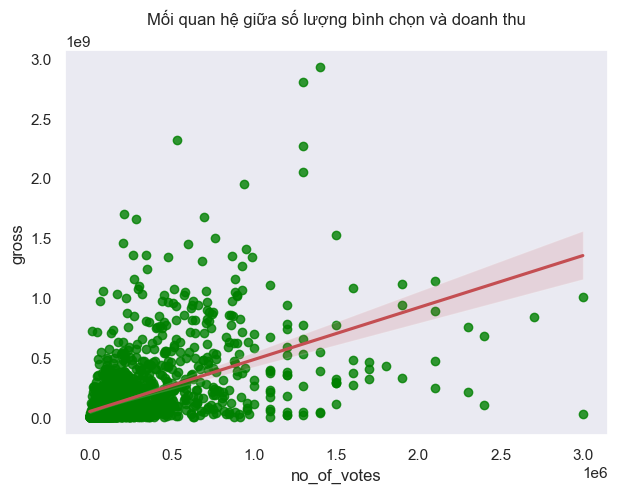

In [8]:
plt.figure(figsize=(7,5));
sns.regplot(data=df_filtered,x='no_of_votes',y='gross',color='green',line_kws=dict(color="r"));
plt.title("Mối quan hệ giữa số lượng bình chọn và doanh thu\n");

In [10]:
import os

directory = "crawl/links"

# Lấy danh sách tên file (không bao gồm phần mở rộng) trong thư mục
txt_files = [os.path.splitext(file)[0] for file in os.listdir(directory) if file.endswith(".txt")]

# In ra danh sách tên file
# for index,genre in enumerate( txt_files):
#     print(f"{index}: {genre}")

txt_files


['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [11]:
df["filtered_genres"] = df["genres"].apply(
    lambda x: ", ".join([genre for genre in txt_files if genre.lower() in x.lower()])
)

In [12]:
# Loại bỏ các giá trị rỗng trong cột 'filtered_genres'
df = df[df["filtered_genres"].notna() & (df["filtered_genres"] != "")]

# Tách các thể loại trong cột 'filtered_genres' thành danh sách
df["filtered_genres_list"] = df["filtered_genres"].str.split(", ")

# Chuyển đổi từ danh sách thể loại sang các hàng riêng biệt
df_exploded = df.explode("filtered_genres_list")

# Nhóm số lượng vote theo từng thể loại và tính tổng
genre_votes = df_exploded.groupby("filtered_genres_list", as_index=False)[
    "no_of_votes"
].sum()

In [13]:
genre_votes = genre_votes.rename(columns={"filtered_genres_list": "genre"})
genre_votes = genre_votes.sort_values(by="no_of_votes", ascending=False)

genre_votes

,genre,no_of_votes
7,Drama,335922427.0
1,Adventure,190876356.0
0,Action,177283327.0
4,Comedy,171011268.0
20,Thriller,142136480.0
17,Sci-Fi,125999090.0
5,Crime,108174617.0
9,Fantasy,106542947.0
14,Mystery,81527326.0
16,Romance,79238995.0


C:\Users\pc\AppData\Local\Temp\ipykernel_8024\467216628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_votes, x="genre", y="no_of_votes", palette="magma")


Text(0, 0.5, 'Thể loại')

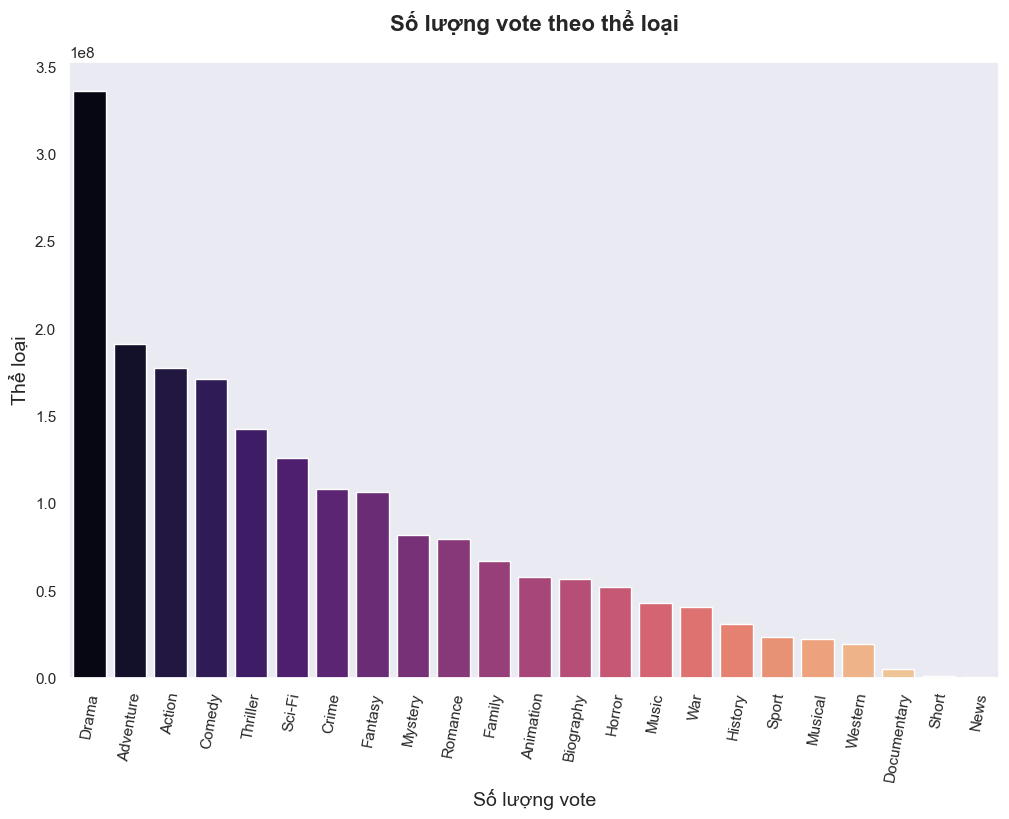

In [ ]:
plt.figure(figsize=(12, 8))


sns.barplot(data=genre_votes, x="genre", y="no_of_votes", palette="magma")


plt.title("Số lượng vote theo thể loại\n", fontsize=16, fontweight="bold")

plt.xticks(rotation=80)

plt.xlabel("Thể loại", fontsize=14)


plt.ylabel("Số lượng vote", fontsize=14)


# Hiển thị biểu đồ


# plt.ti()ght_layout